![](https://i.imgur.com/IhmfRed.png)

## Jaya Raghavendra | jay.raghav333@gmail.com | 7036563656

# TITLE: Predicting the Prices of Used Cars

- Driverless cars are getting closer to reality and at a faster pace than ever. But it is still a bit far fetched dream to have one in your garage. For the time being, there are still a lot of combustion and hybrid cars that roar around the road, for some it chills. Though the overall data on sales of automobiles shows a huge drop in sales in the last couple of years, cars are still a big attraction for many. Cars are more than just a utility for many. They are often the pride and status of the family. We all have different tastes when it comes to owning a car or at least when thinking of owning one.

![](https://i.imgur.com/FcZJgZP.jpg)

## Index

- 0. Problem Statement
- 1. Business Understanding
- 2. Data Exploration
- 3. Data Cleaning
- 4. Data Visualization
- 5. Model Building
- 6. Model EValuation

### Problem Statement

- AIM: To predict the price of used cars based on the previous data obtained from scraping several sources

### 1. Business Solutions & Understanding
- Companies can restrict the selling price of used car being posted by customer in their respective websites.
- Companies can provide a visualization to customers for better understanding of their car selling price.
- Companies can have Fraud Customers who are posting the cars for higher prices.
- Companies can expand its network based on the amount of cars being sold the next year by prediction.

### 2. Data Exploration

In [1]:
#Importing Libraries
import warnings #To avoid warnings based on versions updating
warnings.filterwarnings('ignore')
import numpy as np #For numerical analysis
import pandas as pd #For reading data stored in various file formats
import matplotlib.pyplot as plt  #For visualizations
import seaborn as sns #For Special Visualizations and insights.

In [2]:
#Looking at out directory
import os
os.listdir()

['.ipynb_checkpoints',
 'Data',
 'Data_Test.xlsx',
 'Data_Train.xlsx',
 'debug.log',
 'Model_File',
 'Predicting Food Delivery Time.ipynb',
 'predicting_the_prices_of_used_cars.ipynb',
 'README.md']

In [3]:
# Let's open the training Data excel file
df = pd.read_excel("Data_Train.xlsx")

In [4]:
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


| Parameter | Description  |
| --- | --- |
|Name | The brand and model of the car |
|Location| The location in which the car is being sold or is available for purchase|
|Year| The year or edition of the model|
|Kilometers_Driven |The total kilometres driven in the car by the previous owner(s) in KM|
|Fuel_Type |The type of fuel used by the car|
|Transmission |The type of transmission used by the car|
|Owner_Type| Whether the ownership is Firsthand, Second hand or other|
|Mileage| The standard mileage offered by the car company in kmpl or km/kg|
|Engine| The displacement volume of the engine in cc|
|Power |The maximum power of the engine in bhp|
|Seats| The number of seats in the car|
|New_Price| The price of a new car of the same model|
|Price |The price of the used car in INR Lakhs|

In [5]:
#Information of Data
print("*"*50)
print(df.info())
print("*"*50)

**************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Name                 6019 non-null object
Location             6019 non-null object
Year                 6019 non-null int64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6017 non-null object
Engine               5983 non-null object
Power                5983 non-null object
Seats                5977 non-null float64
New_Price            824 non-null object
Price                6019 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 611.4+ KB
None
**************************************************


---
- Almost of the data is stored as objects and only 2 columns of data is stored in Integers and 2 columbs are floats
- Data Cleaning might play a major role in our model building
---

In [6]:
# Checking Null Values
print("*"*50)
print(df.isnull().sum())
print("*"*50)

**************************************************
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64
**************************************************


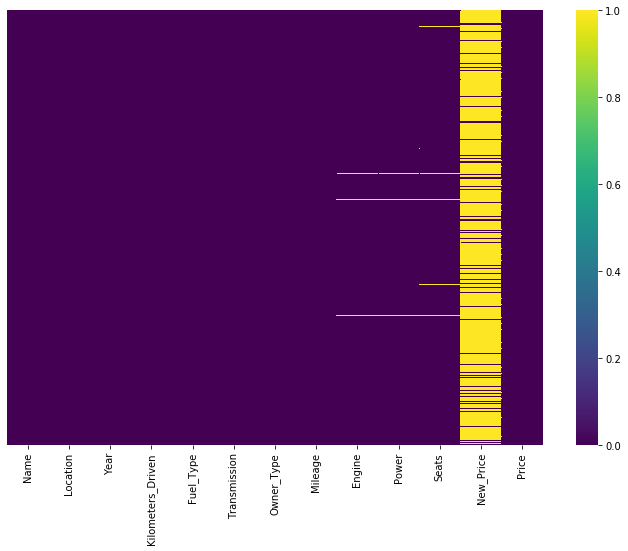

In [7]:
#Visualizing missing values using Seaborn
plt.figure(figsize=(12,8))
sns.heatmap(df.isnull(), cmap='viridis', yticklabels=False)

- We can see that New_Price column values are missing in very high amount and we can drop the column for a cleaner data
- The remaining values can be replaced by imputation.
---

### 03. Data Cleaning

- In our current project data cleaning plays a major role due to the type of data is used

In [8]:
# Dropping New_Price column from both training data
df.drop(labels=['New_Price'], axis=1, inplace=True) #------> Training Data

In [9]:
# Drop the NA Values from Training Data
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [10]:
df.columns

Index(['index', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [11]:
# Let's look at the data in Name column to do further modifications
df.Name[:5]

0              Maruti Wagon R LXI CNG
1    Hyundai Creta 1.6 CRDi SX Option
2                        Honda Jazz V
3                   Maruti Ertiga VDI
4     Audi A4 New 2.0 TDI Multitronic
Name: Name, dtype: object

In [12]:
# We can see that the names are starting with Brand names and then the odel name followed by some of its specification
# Lets clean the data so that we can store Brand and Model name of cars in a seperate column
df['Brand'] = df.Name.apply(lambda x: x.split(" ")[0])
df['Model_Name'] = df.Name.apply(lambda x: " ".join(x.split(" ")[1:]))

# Drop the Name column after adding the columns
df.drop(labels=['Name'], axis=1, inplace=True)

In [13]:
df.columns

Index(['index', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price', 'Brand', 'Model_Name'],
      dtype='object')

In [14]:
#reordering the columns
df = df[['Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission', 
         'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']]

In [15]:
# Column ------> Mileage
df.Mileage[:5]

0    26.6 km/kg
1    19.67 kmpl
2     18.2 kmpl
3    20.77 kmpl
4     15.2 kmpl
Name: Mileage, dtype: object

In [16]:
# Extract the numerical from the object data using split commands in both training data
df.Mileage = df.Mileage.apply(lambda x: str(x.split(" ")[0]))
df.Engine = df.Engine.apply(lambda x: str(x.split(" ")[0]))
df.Power = df.Power.apply(lambda x: str(x.split(" ")[0]))

In [17]:
# Let's look at the dataframes
df.head()

,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [18]:
# Data types of objects.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5975 entries, 0 to 5974
Data columns (total 13 columns):
Brand                5975 non-null object
Model_Name           5975 non-null object
Location             5975 non-null object
Year                 5975 non-null int64
Kilometers_Driven    5975 non-null int64
Fuel_Type            5975 non-null object
Transmission         5975 non-null object
Owner_Type           5975 non-null object
Mileage              5975 non-null object
Engine               5975 non-null object
Power                5975 non-null object
Seats                5975 non-null float64
Price                5975 non-null float64
dtypes: float64(2), int64(2), object(9)
memory usage: 607.0+ KB


In [19]:
for i in df.columns:
    print('#'*50)
    print(df[i].value_counts())
    print("#"*50)

##################################################
Maruti           1197
Hyundai          1100
Honda             601
Toyota            409
Mercedes-Benz     318
Volkswagen        315
Ford              298
Mahindra          271
BMW               262
Audi              236
Tata              186
Skoda             173
Renault           145
Chevrolet         121
Nissan             91
Land               57
Jaguar             40
Mitsubishi         27
Mini               26
Fiat               25
Volvo              21
Porsche            18
Jeep               15
Datsun             13
Force               3
ISUZU               2
Isuzu               1
Lamborghini         1
Bentley             1
Ambassador          1
Smart               1
Name: Brand, dtype: int64
##################################################
##################################################
XUV500 W8 2WD           49
Swift VDI               45
City 1.5 S MT           34
Swift Dzire VDI         34
Swift VDI BSIV          31
    

---
- While cleaning the Power Data I have found some values were entered as "null bhp" so we have to obtain the df where the values are not null
---

In [20]:
df = df[df.Power != 'null']

In [21]:
# Extract the numerical from the object data using split commands in both training data
df.Mileage = df.Mileage.apply(lambda x: float(x))
df.Engine = df.Engine.apply(lambda x: float(x))
df.Power = df.Power.apply(lambda x: float(x))

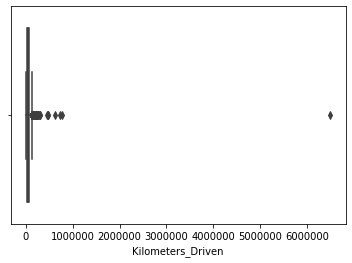

In [22]:
sns.boxplot(df.Kilometers_Driven)

In [23]:
# Clean the top outliers
for i in np.arange(50):
    index = df[df.Kilometers_Driven == df.Kilometers_Driven.max()].index
    df.drop(index=index, inplace=True, axis=1)
df.reset_index(inplace=True)

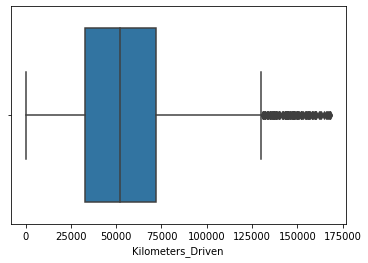

In [24]:
sns.boxplot(df.Kilometers_Driven)

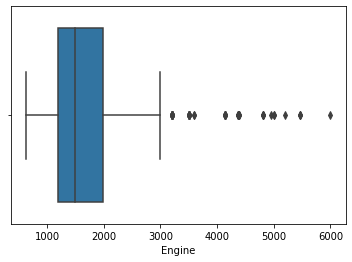

In [25]:
sns.boxplot(df.Engine)

In [26]:
# Clean the top outliers
for i in np.arange(7):
    index = df[df.Engine == df.Engine.max()].index
    df.drop(index=index, inplace=True, axis=1)
df.reset_index(inplace=True)

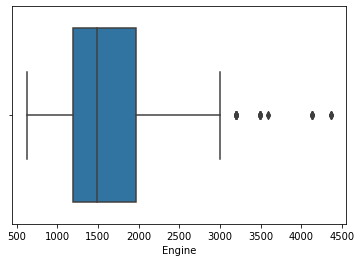

In [27]:
sns.boxplot(df.Engine)

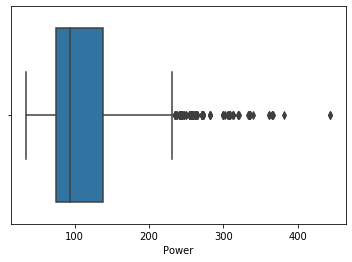

In [28]:
sns.boxplot(df.Power)

In [29]:
# Clean the top outliers
for i in np.arange(25):
    index = df[df.Power == df.Power.max()].index
    df.drop(index=index, inplace=True, axis=1)

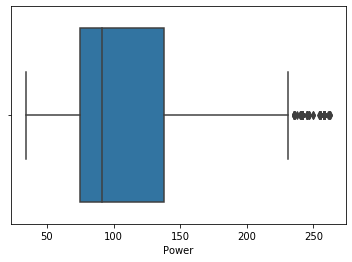

In [30]:
sns.boxplot(df.Power)

## 04. Data Visualization

![](https://i.imgur.com/yeq5YcK.png)

In [31]:
df.head()

,level_0,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


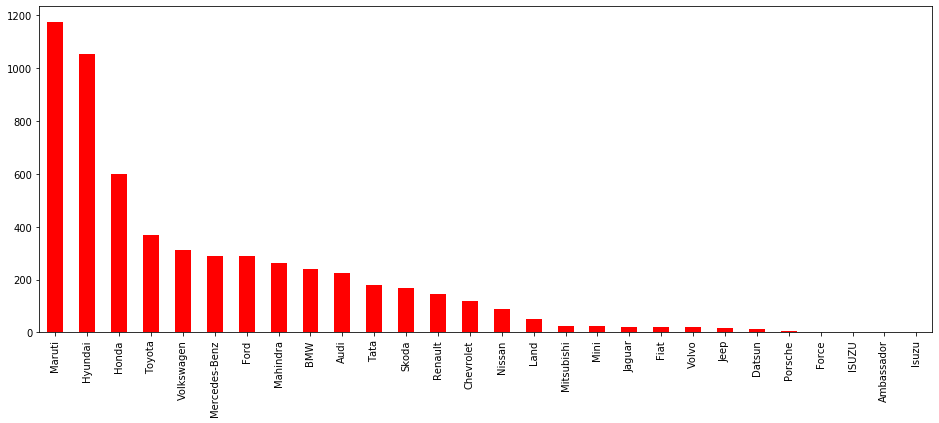

In [32]:
# Let us look at the top brands
plt.figure(figsize=(16,6))
pd.value_counts(df.Brand).plot.bar(color='r')

- Maruti, Hyundai & Honda tops the list as most selling cars
---

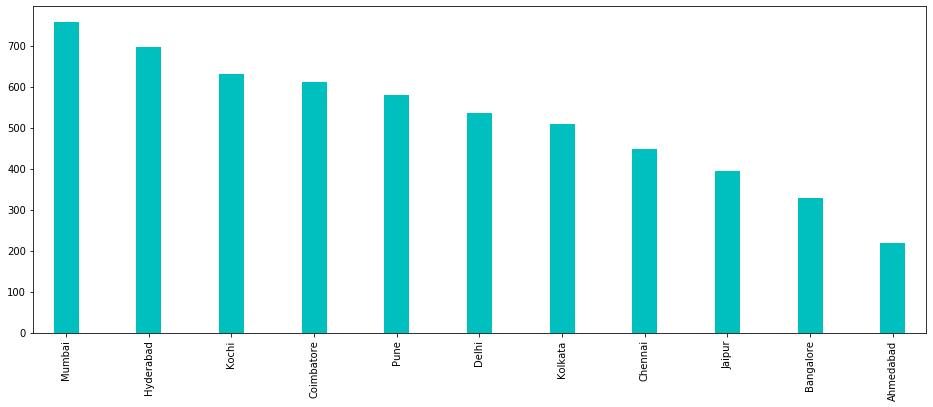

In [33]:
# Let us look at the fuel type
plt.figure(figsize=(16,6))
pd.value_counts(df.Location).plot.bar(color='c', width=0.3)

- Most of the Used cars are being sold in Mumbai, Hyderabad and Kochi
---

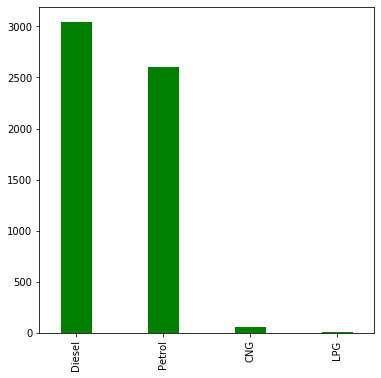

In [34]:
# Let us look at the fuel type
plt.figure(figsize=(6,6))
pd.value_counts(df.Fuel_Type).plot.bar(color='g', width = 0.35)

- Most of the are Diesel and Petrol only
---

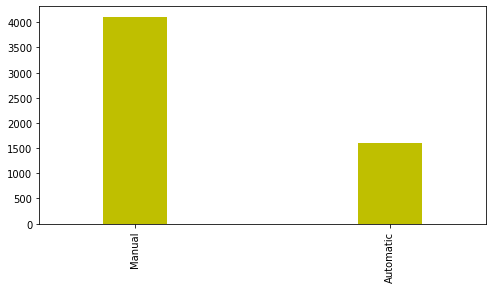

In [35]:
# Let us look at the fuel type
plt.figure(figsize=(8,4))
pd.value_counts(df.Transmission).plot.bar(color='y', width = 0.25)

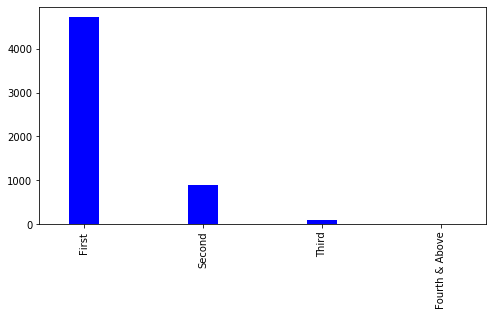

In [36]:
# Let us look at the fuel type
plt.figure(figsize=(8,4))
pd.value_counts(df.Owner_Type).plot.bar(color='b', width = 0.25)

- Most of the sold cars are first hand cars.
---

In [37]:
df.head()

,level_0,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,0,Maruti,Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,1,1,Hyundai,Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,2,2,Honda,Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,3,3,Maruti,Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,4,4,Audi,A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [38]:
df.drop(labels=['level_0'], axis=1, inplace=True)

## 05. Model Building

In [39]:
# Convert the categorical data info numerical categories for machine to understand using LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [40]:
df.columns

Index(['index', 'Brand', 'Model_Name', 'Location', 'Year', 'Kilometers_Driven',
       'Fuel_Type', 'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power',
       'Seats', 'Price'],
      dtype='object')

In [41]:
encoder = LabelEncoder()

In [42]:
# Encode the categorical columns of training data
df.Brand = encoder.fit_transform(df.Power)
df.Model_Name = encoder.fit_transform(df.Model_Name)
df.Location = encoder.fit_transform(df.Location)
df.Owner_Type = encoder.fit_transform(df.Owner_Type)
df.Fuel_Type = encoder.fit_transform(df.Fuel_Type)
df.Transmission = encoder.fit_transform(df.Transmission)

In [43]:
df.head()

,index,Brand,Model_Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,0,23,1525,9,2010,72000,0,1,0,26.60,998.0,58.16,5.0,1.75
1,1,187,431,10,2015,41000,1,1,0,19.67,1582.0,126.20,5.0,12.50
2,2,105,856,2,2011,46000,3,1,0,18.20,1199.0,88.70,5.0,4.50
3,3,107,581,2,2012,87000,1,1,0,20.77,1248.0,88.76,7.0,6.00
4,4,207,83,3,2013,40670,1,0,2,15.20,1968.0,140.80,5.0,17.74


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5713 entries, 0 to 5789
Data columns (total 14 columns):
index                5713 non-null int64
Brand                5713 non-null int64
Model_Name           5713 non-null int32
Location             5713 non-null int32
Year                 5713 non-null int64
Kilometers_Driven    5713 non-null int64
Fuel_Type            5713 non-null int32
Transmission         5713 non-null int32
Owner_Type           5713 non-null int32
Mileage              5713 non-null float64
Engine               5713 non-null float64
Power                5713 non-null float64
Seats                5713 non-null float64
Price                5713 non-null float64
dtypes: float64(5), int32(5), int64(4)
memory usage: 557.9 KB


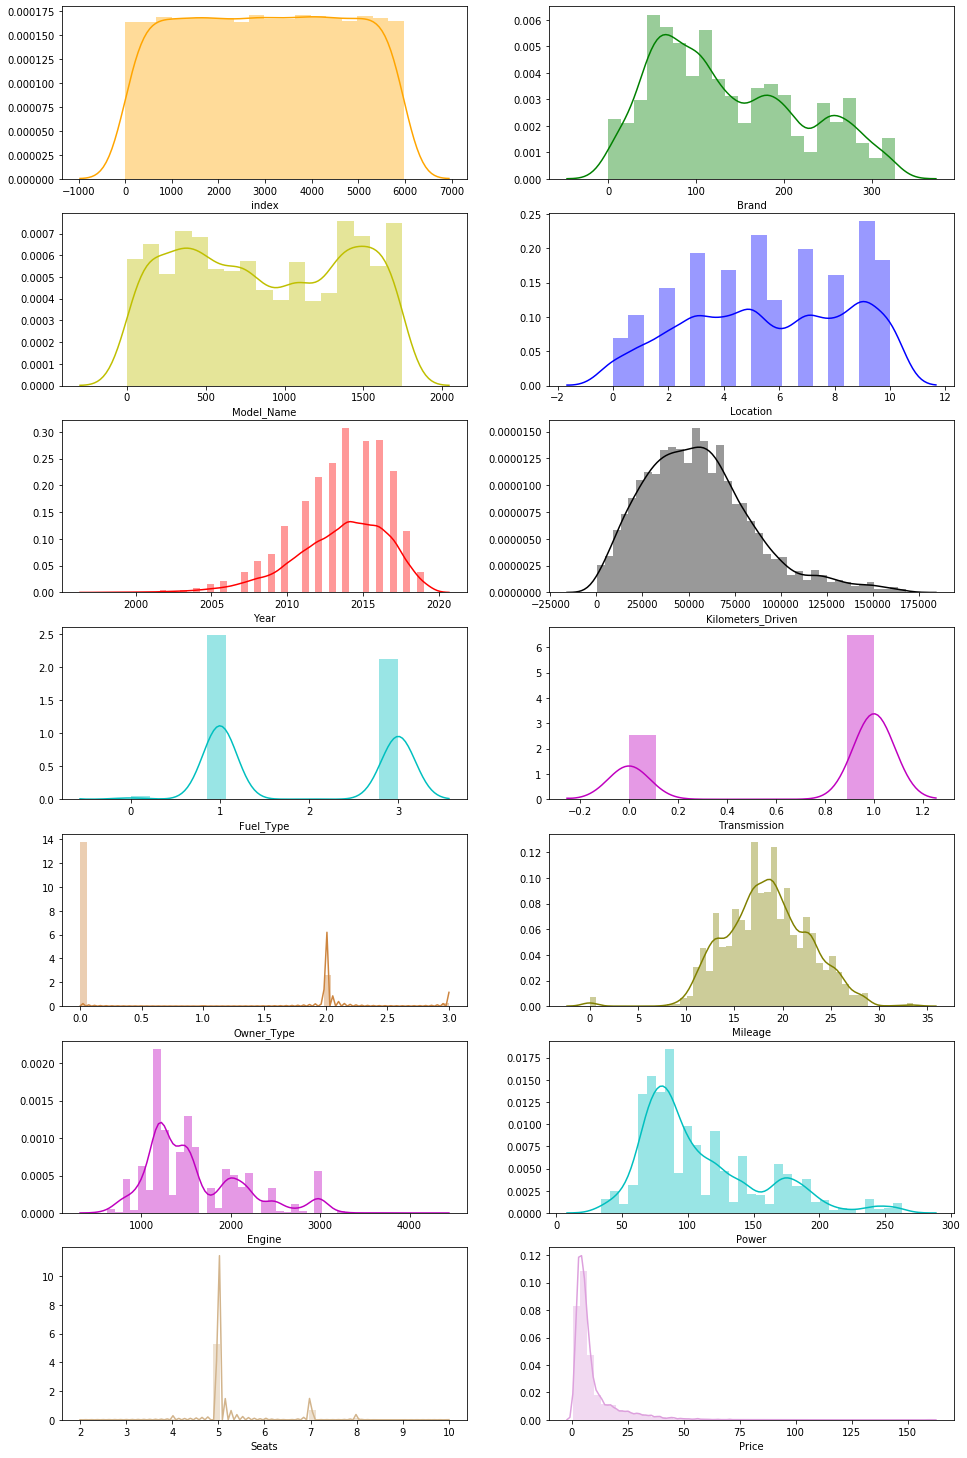

In [45]:
# Let us check the distribution graphs for our data
plt.figure(figsize=(16,26))
c = ['r','Orange','g','y','b','r','k','c','m', 'peru', 'olive', 'm', 'c', 'tan', 'plum']
for i in np.arange(1,15):
    plt.subplot(7,2,i)
    sns.distplot(df[df.columns[i-1]], color=c[i])

### Data Insights

(14.0, 0.0)

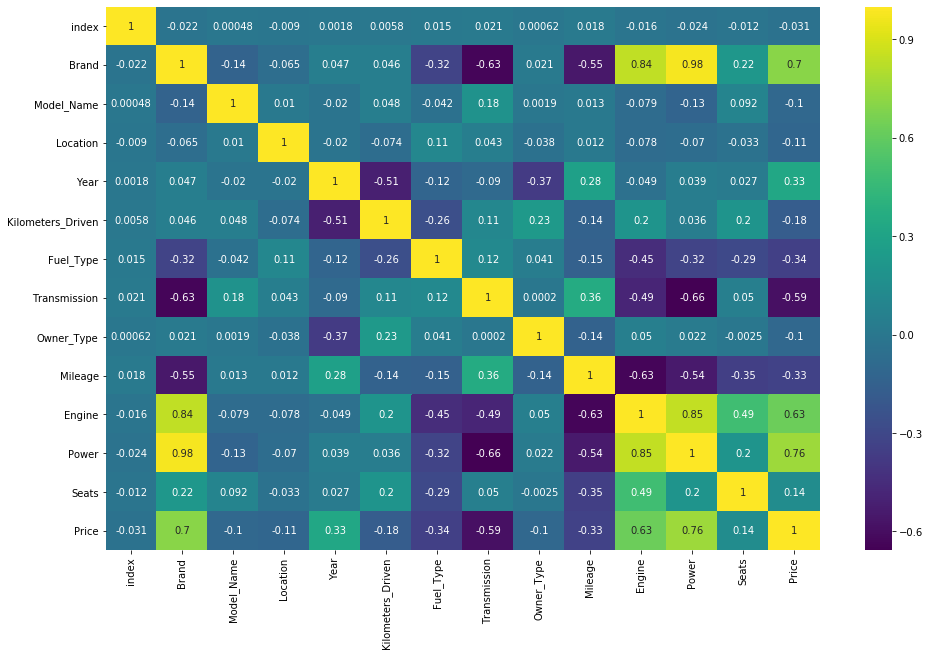

In [46]:
# Correlation between the data columns in training data
plt.figure(figsize=(16,10))
ax = sns.heatmap(df.corr(), annot=True, cmap='viridis')

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

- We can see that price is highly related with
    
    - Engine
    - Power

In [47]:
# Let us define the Dependent & Independent variables to train our model
X = df.drop(labels=['Price', 'Model_Name', 'Transmission'], axis=1)
# Dropping transmission because it is completely negatively corelated to price
y = df['Price']

In [48]:
X.columns

Index(['index', 'Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [49]:
X = X.iloc[:,1:]

In [50]:
X.columns

Index(['Brand', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats'],
      dtype='object')

In [51]:
# Scale the data to achieve accurate training results.
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3999, 10) (1714, 10) (3999,) (1714,)


In [53]:
#import required libraries
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [54]:
# Create a function to print Metrics of our data, similar to classification report
# import required Sci-Kit Learn metrics for cmpiling
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error, r2_score, accuracy_score
import math

def model_report(y_true, y_pred):
    print('R2 Score : ', r2_score(y_true, y_pred))
    print("Root Mean Squared Error : ", math.sqrt(mean_squared_error(y_true, y_pred)))


In [55]:
# Let us create an Accuracy function to define our model accuracy
def score(y_pred, y_true):
    error = np.square(np.log10(y_pred +1) - np.log10(y_true +1)).mean() ** 0.5
    score = 1 - error
    return score

In [56]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

print('#'*50)
print(model_report(y_test, y_pred))
print('#'*50)

print('Accuracy:',score(y_test, y_pred).round(4)*100)
print('#'*50)

##################################################
R2 Score :  0.7403688501929651
Root Mean Squared Error :  5.0230189120701
None
##################################################
Accuracy: 78.84
##################################################


In [57]:
params = dict(n_neighbors = list(range(1, 20)))
knn_model = GridSearchCV(KNeighborsRegressor(), param_grid = params, cv = 5, scoring = 'neg_mean_squared_error')
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

print('#'*50)
print(model_report(y_test, y_pred))
print('#'*50)

print('Accuracy:',score(y_test, y_pred).round(4)*100)
print('#'*50)

##################################################
R2 Score :  0.8600243532830332
Root Mean Squared Error :  3.6881846528143822
None
##################################################
Accuracy: 89.75
##################################################


In [58]:
params = dict(max_depth = list(range(1,30)))
tree_model = GridSearchCV(DecisionTreeRegressor(), param_grid = params, cv = 5)
tree_model.fit(X_train, y_train)
y_pred = tree_model.predict(X_test)

print('#'*50)
print(model_report(y_test, y_pred))
print('#'*50)

print('Accuracy:',score(y_test, y_pred).round(4)*100)
print('#'*50)


##################################################
R2 Score :  0.83871495691834
Root Mean Squared Error :  3.9589814081450068
None
##################################################
Accuracy: 87.94
##################################################


In [59]:
param_distributions = dict(n_estimators = [100,200,300,400,500], min_samples_split = [2,5,10])
randomModel = RandomizedSearchCV(RandomForestRegressor(), param_distributions, n_iter=10, scoring='neg_mean_squared_error', n_jobs=-1)
randomModel.fit(X_train, y_train)
y_pred = randomModel.predict(X_test)

print('#'*50)
print(model_report(y_test, y_pred))
print('#'*50)

print('Accuracy:',score(y_test, y_pred).round(4)*100)
print('#'*50)

##################################################
R2 Score :  0.9206634357337986
Root Mean Squared Error :  2.7766625929166358
None
##################################################
Accuracy: 92.43
##################################################


In [60]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5],
                'n_estimators': [100, 200, 300, 400, 500],
                'reg_lambda': [0.001, 0.1, 1.0]
               }
XGB_model = RandomizedSearchCV(XGBRegressor(), tuned_params, n_iter=20, scoring = 'neg_mean_absolute_error', cv=5, n_jobs=-1)
XGB_model.fit(X_train, y_train)
y_pred = XGB_model.predict(X_test)

print('#'*50)
print(model_report(y_test, y_pred))
print('#'*50)

print('Accuracy:',score(y_test, y_pred).round(4)*100)
print('#'*50)

[05:03:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
##################################################
R2 Score :  0.928523979555144
Root Mean Squared Error :  2.6355217046902495
None
##################################################
Accuracy: 92.86999999999999
##################################################


# Thank You